In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\maztl\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [10]:
df['total_spend']=df['TV']+df['radio']+df['newspaper']

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

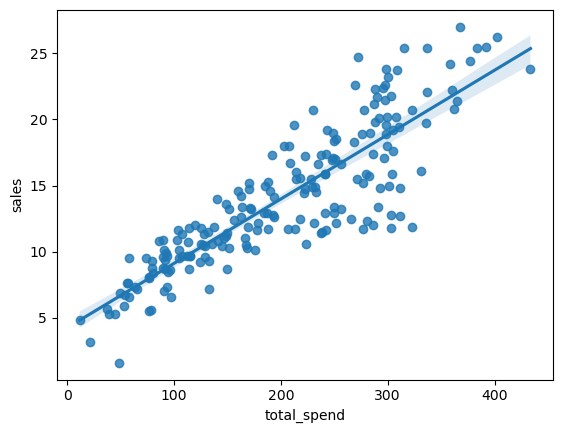

In [11]:
sns.regplot(data=df,x='total_spend',y='sales')

In [12]:
X=df['total_spend']
y=df['sales']

In [13]:
# y=mx + b
# y=B0 + B1X
np.polyfit(X,y,deg=1) 
# will be as  b0  b1

array([0.04868788, 4.24302822])

In [16]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


In [ ]:
# fig,ax=plt.subplots(row,column,figsize=(%,$))
# ax[0].plot() 使用位置編輯資訊

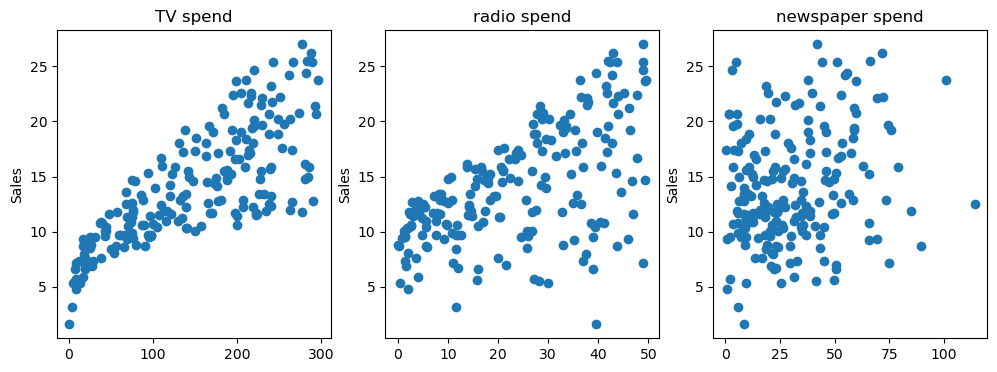

In [29]:
fig,ax=plt.subplots(1,3,figsize=(12,4))
ax[0].plot(df['TV'],df['sales'],'o')
ax[0].set_ylabel('Sales')
ax[0].set_title('TV spend')
ax[1].plot(df['radio'],df['sales'],'o')
ax[1].set_ylabel('Sales')
ax[1].set_title('radio spend')
ax[2].plot(df['newspaper'],df['sales'],'o')
ax[2].set_ylabel('Sales')
ax[2].set_title('newspaper spend')
plt.show()

In [34]:
X=df.drop(['sales','total_spend'],axis=1)
Y=df['sales']

In [37]:
from sklearn.model_selection import train_test_split

In [38]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101)

In [41]:
from sklearn.linear_model import LinearRegression

In [48]:
model = LinearRegression()
model.fit(x_train,y_train)
testpredict= model.predict(x_test) 
# predict出y數值，再跟y_test實際值來做比較

In [49]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

performance evaluation :  such as MAE RMSE(most popular)

In [54]:
mae= mean_absolute_error(y_test,testpredict)
rmse =np.sqrt(mean_squared_error(y_test,testpredict))

In [55]:
mae,rmse

(1.2137457736144805, 1.5161519375993877)

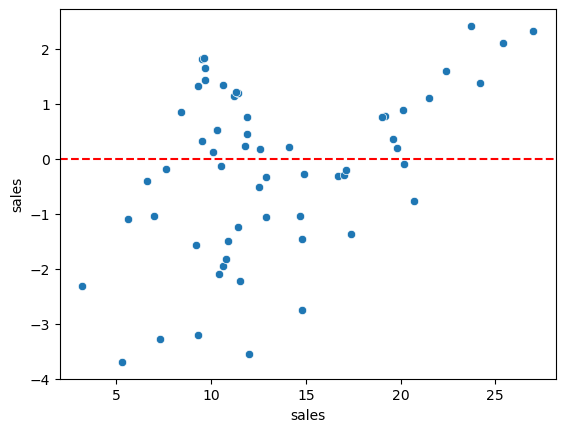

In [61]:
test_residual= y_test-testpredict
sns.scatterplot(x=y_test,y=test_residual)
plt.axhline(y=0,color='r',ls='--')

After sastisfied by the performance of the model and are ready to deploy it

In [66]:
finalmodel=LinearRegression()
finalmodel.fit(X,y)

LinearRegression()

In [69]:
# check out the lecture notebook

In [68]:
finalmodel.coef_
# 分別對應到 tv radio newspaper

array([ 0.04576465,  0.18853002, -0.00103749])

儲存和導入模型

In [70]:
from joblib import dump,load

In [71]:
dump(finalmodel,'final_sales_model.joblib')

['final_sales_model.joblib']

In [72]:
loaded_model=load('final_sales_model.joblib')

In [75]:
campaign=[[149,22,12]] # 因為是原本的X是二維的資料

In [76]:
loaded_model.predict(campaign)

C:\Users\maztl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([13.893032])

## polynomial regression

In [2]:
df=pd.read_csv('UNZIP_FOR_NOTEBOOKS_FINAL/08-Linear-Regression-Models/Advertising.csv')
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
X=df.drop('sales',axis=1)
y=df['sales']

In [5]:
from sklearn.preprocessing import PolynomialFeatures

polynomial_converter = PolynomialFeatures(degree=2,include_bias=False)
# Converter "fits" to data, in this case, reads in every X column
# Then it "transforms" and ouputs the new polynomial data
poly_features=polynomial_converter.fit_transform(X)

In [7]:
poly_features.shape

(200, 9)

In [8]:
poly_features[0]

array([2.301000e+02, 3.780000e+01, 6.920000e+01, 5.294601e+04,
       8.697780e+03, 1.592292e+04, 1.428840e+03, 2.615760e+03,
       4.788640e+03])

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(poly_features, y, test_size=0.3, random_state=101)

In [13]:
from sklearn.linear_model import LinearRegression
model=LinearRegression(fit_intercept=True)
model.fit(X_train,y_train)

test_predict=model.predict(X_test)

In [14]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [15]:
mae = mean_absolute_error(y_test,test_predict)
rmse=np.sqrt(mean_squared_error(y_test,test_predict))

In [16]:
mae

0.48967980448037024

In [17]:
rmse

0.6646431757269196

### Comparison with Simple Linear Regression

**Results on the Test Set (Note: Use the same Random Split to fairly compare!)**

* Simple Linear Regression:
    * MAE: 1.213
    * RMSE: 1.516

* Polynomial 2-degree:
    * MAE: 0.4896
    * RMSE: 0.664

In [18]:
train_rmse=[]
test_rmse=[]
for i in range(1,8):
    polynomial_converter=PolynomialFeatures(degree=i,include_bias=False)
    poly_features=polynomial_converter.fit_transform(X)
    x_train,x_test,y_train,y_test=train_test_split(poly_features,y,test_size=0.3,random_state=101)
    
    model=LinearRegression(fit_intercept=True)
    model.fit(x_train,y_train)
    
    train_predict=model.predict(x_train)
    test_predict=model.predict(x_test)
    
    tr_rmse=np.sqrt(mean_squared_error(y_train,train_predict))
    te_rmse=np.sqrt(mean_squared_error(y_test,test_predict))

    train_rmse.append(tr_rmse)
    test_rmse.append(te_rmse)

In [20]:
train_rmse

[1.734594124329376,
 0.5879574085292231,
 0.4339344356902067,
 0.35170836883993495,
 0.2509342951990948,
 0.19712540098419928,
 5.421422348088047]

In [21]:
test_rmse

[1.5161519375993877,
 0.6646431757269196,
 0.5803286825231458,
 0.5077742623872591,
 2.5758247707699033,
 4.49267077389683,
 1381.404068580476]

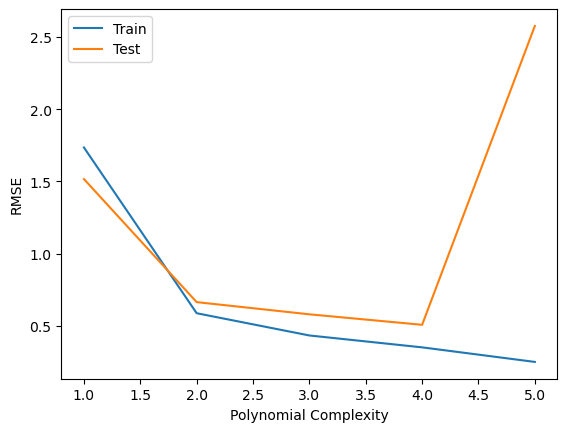

In [25]:
plt.plot(range(1,6),train_rmse[:5],label='Train')
plt.plot(range(1,6),test_rmse[:5],label='Test')
plt.legend()
plt.xlabel("Polynomial Complexity")
plt.ylabel("RMSE")
plt.show()

In [26]:
finalconverter=PolynomialFeatures(degree=3,include_bias=False)
final_model=LinearRegression()
final_model.fit(finalconverter.fit_transform(X),y)

LinearRegression()

In [28]:
from joblib import dump, load

In [30]:
dump(final_model, 'sales_poly_model.joblib')
dump(finalconverter,'poly_converter.joblib')

['poly_converter.joblib']

In [31]:
loaded_poly = load('poly_converter.joblib')
loaded_model = load('sales_poly_model.joblib')

In [33]:
campaign = [[149,22,12]]
campaign_poly=loaded_poly.transform(campaign)
loaded_model.predict(campaign_poly)

C:\Users\maztl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([14.64501014])